In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as scio
import numpy as np
import os

In [6]:

EcoG_title = "ECoG_"

onset_time_list = {"HS44":0,"HS45":0,"HS47":0,"HS48":0,"HS50":0,"HS54":0,"HS71":0,"HS73":0,"HS76":0}

forward = int(25)
backward = int(85)


class HS_data():


    def __init__(self, HS):
        self.HS = HS
        self.sound_list = self.__get_sound_list()
        self.task_name_list = self.__get_task_name_list()
        self.save_path = "F_values\\" + "HS" + str(self.HS) + "\\"
        self.save_sig_name = "HS"+str(self.HS)+"_F_sig.npy"
        self.save_name = "HS"+str(self.HS)+"_F_values.npy"
        self.__mkdir()
        self.__load_data()
        self.onset_time = int(np.floor(100 * onset_time_list["HS" + str(self.HS)])) + 150
        self.channel = 128 if self.HS == 44 else 256
        self.f_values_dict = {}
        self.sig_elecs_dis = {}
        
    def __load_data(self):
        mat_path = "HSblockdata\\HS" + str(self.HS) + "_Block_overt_covert.mat"
        self.HSblock = scio.loadmat(mat_path)
        self.HSblock = self.HSblock["Alldata"][0][0]

    def __mkdir(self):
        if not os.path.exists(self.save_path):
            os.mkdir(self.save_path)

    def __get_sound_list(self):

        if self.HS < 70:
            sound_list = ["ba", "bu", "da", "du", "ga", "gu"]
        else:
            sound_list = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]

        return sound_list

    def __get_task_name_list(self):

        if self.HS < 70:
            task_name_list = ["overt", "covert"]
        else:
            task_name_list = ["overt", "covert", "cue"]

        return task_name_list

    def calculate_save_f_values(self):
        
        for task_name in self.task_name_list:
            self.f_values_dict[task_name] = []
            for elec in range(self.channel):
                if HS < 70:
                    a,b,c,d,e,f = (self.HSblock[EcoG_title+task_name+"_"+sound][:,elec,:].T for sound in self.sound_list)
                    df = stats.f_oneway(
                        a[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(a).any(axis=0)].T,
                        b[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(b).any(axis=0)].T,
                        c[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(c).any(axis=0)].T,
                        d[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(d).any(axis=0)].T,
                        e[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(e).any(axis=0)].T,
                        f[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(f).any(axis=0)].T,
                         )
                else:
                    a,b,c,d,e,f,g,h = (self.HSblock[EcoG_title+task_name+"_"+sound][:,elec,:].T for sound in self.sound_list)
                    df = stats.f_oneway(
                        a[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(a).any(axis=0)].T,
                        b[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(b).any(axis=0)].T,
                        c[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(c).any(axis=0)].T,
                        d[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(d).any(axis=0)].T,
                        e[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(e).any(axis=0)].T,
                        f[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(f).any(axis=0)].T,
                        g[int(self.onset_time - forward):int(self.onset_time + backward), :][:, ~np.isnan(g).any(axis=0)].T,
                        h[int(self.onset_time - forward):int(self.onset_time + backward), :][:,
                        ~np.isnan(h).any(axis=0)].T )
                self.f_values_dict[task_name].append([df.statistic,df.pvalue])
            self.f_values_dict[task_name] = np.array(self.f_values_dict[task_name])
            print(self.f_values_dict[task_name].shape)

    
        np.save(self.save_path+self.save_name,self.f_values_dict)

        return self.f_values_dict
        
    def find_continus(self,aa):
        l1 = []
        total = []
        for x in sorted(set(aa)):
            l1.append(x)
            if x+1 not in aa:
                total.append(l1)
                l1 = []
        return total
    
    def get_max_len(self,aa):
        max_len = 0
        for a in aa:
            if len(a)>max_len:
                max_len = len(a)
        return max_len
    
    def get_sig_elecs(self):
        self.sig_elecs_dis = {}

        for i in range(len(self.task_name_list)):
            self.sig_elecs_dis[self.task_name_list[i]] = []
            for elec in range(self.channel):
                seg_index = np.where(self.f_values_dict[self.task_name_list[i]][elec,1,:]<(0.01))[0]
                if len(seg_index)>0:
                    max_len = self.get_max_len(self.find_continus(seg_index))
                    if max_len>=10:
                        self.sig_elecs_dis[self.task_name_list[i]].append(elec)
            print(self.task_name_list[i]+': ',len(self.sig_elecs_dis[self.task_name_list[i]]))
        np.save(self.save_path+self.save_sig_name,self.sig_elecs_dis)



In [9]:
HS_list = [44,71]


for HS in HS_list:
    print(HS)
    Data = HS_data(HS)
    Data.calculate_save_f_values()
    Data.get_sig_elecs()

44
(128, 2, 110)
(128, 2, 110)
overt:  92
covert:  55
71
(256, 2, 110)
(256, 2, 110)
(256, 2, 110)
overt:  20
covert:  14
cue:  19


# 检查F值的计算

In [77]:
HSblock = np.load("F_values\\HS76\\HS76_F_values.npy",allow_pickle=True).item()
HSblock.keys()

dict_keys(['overt', 'covert', 'cue'])

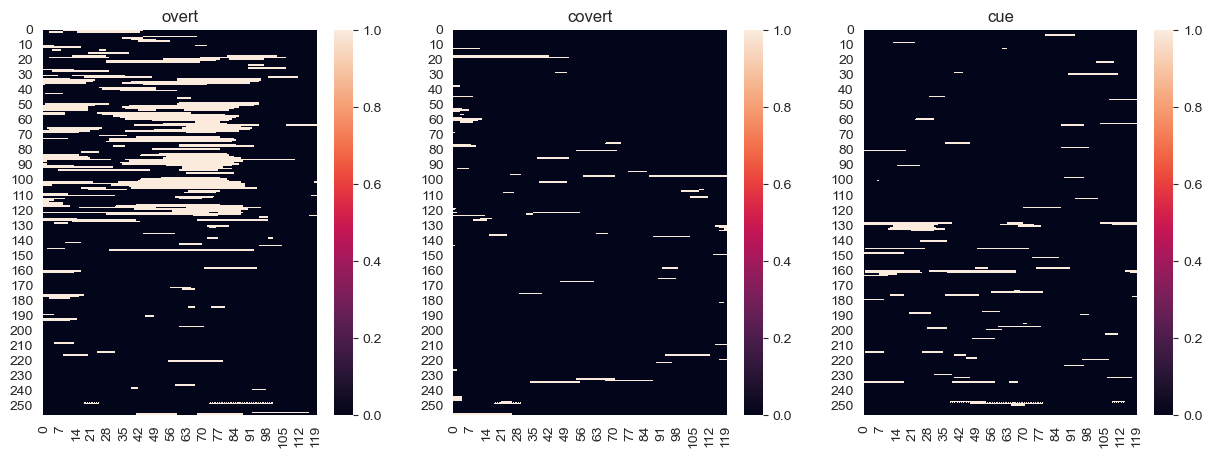

In [80]:
import seaborn as sns
fig, axs =  plt.subplots(1,3,figsize=(15,5))
task_name_list = ["overt","covert","cue"]


for i in range(3):

    sns.heatmap(HSblock[task_name_list[i]][:,1,:]<(0.01), ax = axs[i],vmax=1,vmin=0)
    axs[i].set_title(task_name_list[i])



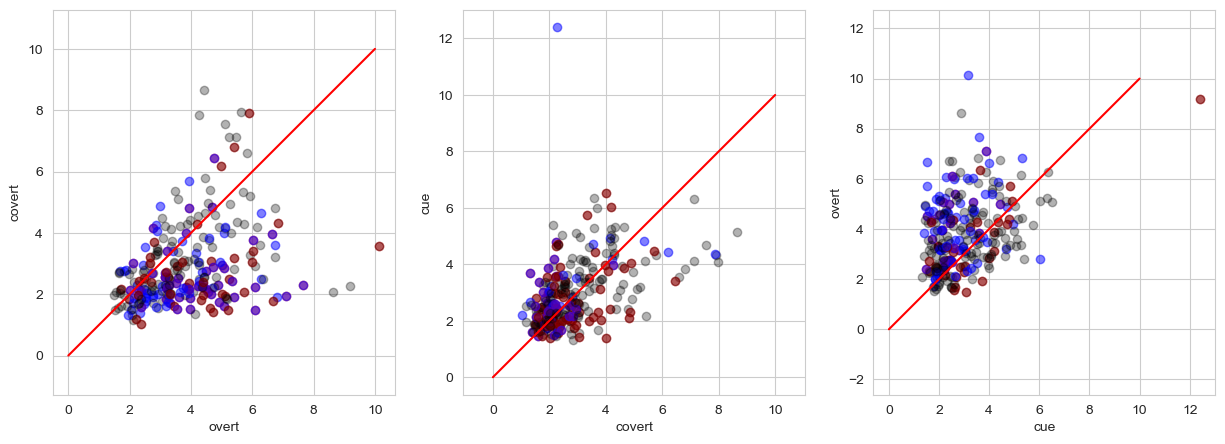

In [15]:
HS = 73
elec_path = "D:\\BaiduSyncdisk\\code\\elecs\\"+str(HS)+"sig_elecs.npy"
sig_elecs = np.load(elec_path,allow_pickle=True).item()

max_f = np.zeros([3,256])
for i in range(3):
    max_f[i] = np.max(HSblock[task_name_list[i]][:,0,:],axis=1)


fig, axs =  plt.subplots(1,3,figsize=(15,5))
factor_0_list = np.array([1,2,3])-1
factor_1_list = np.array([2,3,1])-1

for i in range(3):
    for elec in range(256):
        if elec in sig_elecs[task_name_list[factor_0_list[i]]]:
            axs[i].scatter(max_f[factor_0_list[i],elec],max_f[factor_1_list[i],elec],color='r',alpha=0.5)
        if elec in sig_elecs[task_name_list[factor_1_list[i]]]:
            axs[i].scatter(max_f[factor_0_list[i],elec],max_f[factor_1_list[i],elec],color='b',alpha=0.5)
        else:
            axs[i].scatter(max_f[factor_0_list[i],elec],max_f[factor_1_list[i],elec],color='k',alpha=0.3)
    axs[i].axis("equal")
    axs[i].plot(np.linspace(0,10,10),np.linspace(0,10,10),'r')
    axs[i].set_xlabel(task_name_list[factor_0_list[i]])
    axs[i].set_ylabel(task_name_list[factor_1_list[i]])


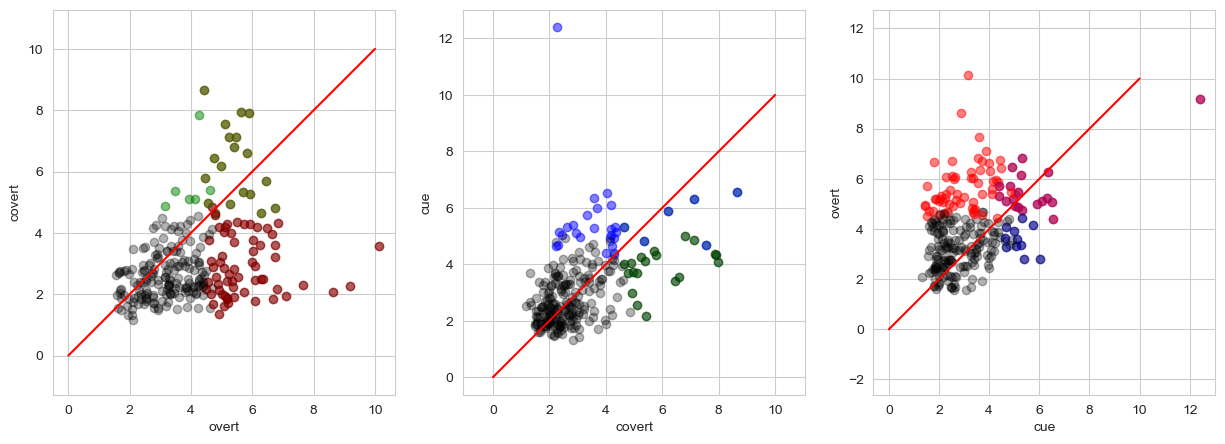

In [66]:
HS = 76
elec_path = "D:\\BaiduSyncdisk\\code\\elecs\\"+str(HS)+"sig_elecs.npy"

max_f = np.zeros([3,256])
for i in range(3):
    max_f[i] = np.max(HSblock[task_name_list[i]][:,0,:],axis=1)
fig, axs =  plt.subplots(1,3,figsize=(15,5))
factor_0_list = np.array([1,2,3])-1
factor_1_list = np.array([2,3,1])-1
colorset = ['r','g','b']
for i in range(3):
    for elec in range(256):
        if elec in sig_elecs_dis[task_name_list[factor_0_list[i]]]:
            axs[i].scatter(max_f[factor_0_list[i],elec],max_f[factor_1_list[i],elec],color=colorset[factor_0_list[i]],alpha=0.5)
        if elec in sig_elecs_dis[task_name_list[factor_1_list[i]]]:
            axs[i].scatter(max_f[factor_0_list[i],elec],max_f[factor_1_list[i],elec],color=colorset[factor_1_list[i]],alpha=0.5)
        else:
            axs[i].scatter(max_f[factor_0_list[i],elec],max_f[factor_1_list[i],elec],color='k',alpha=0.3)
    axs[i].axis("equal")
    axs[i].plot(np.linspace(0,10,10),np.linspace(0,10,10),'r')
    axs[i].set_xlabel(task_name_list[factor_0_list[i]])
    axs[i].set_ylabel(task_name_list[factor_1_list[i]])


# 把使用F值对于八个音节的discriminability分辨能力进行显著性检验，关于各个任务
# 李老师这里用的permutation，deltaR2用的0.05/256

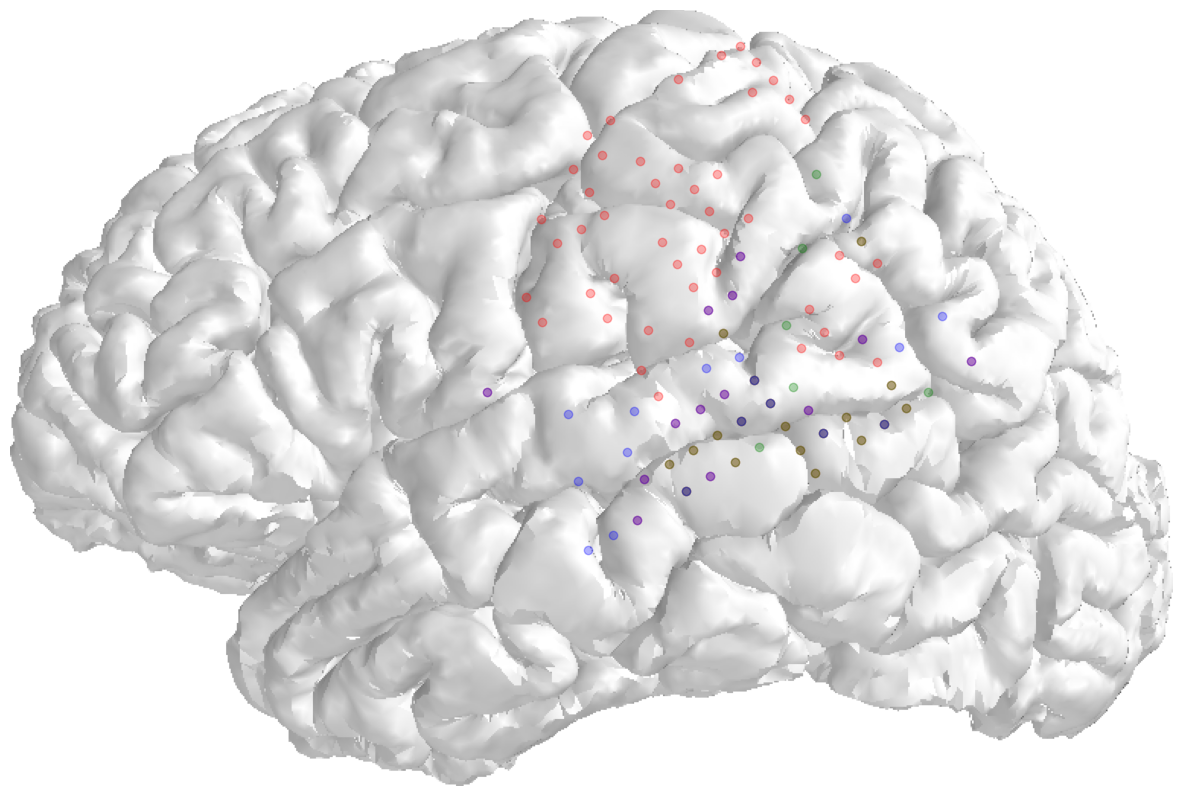

In [60]:
import matplotlib.image as mpimg
import scipy.io as scio



HS = 73
path = "D:\\BaiduSyncdisk\\code\\elecs\\"

subject = 'HS'+str(HS)
img = mpimg.imread(path + subject + "_brain2D.png")
xy = scio.loadmat(path + subject + "_elec_pos2D.mat")['elecmatrix']
plt.figure(figsize=(15,15))

plt.imshow(img)
n_chans = 256 if xy.shape[0] >= 256 else 128
colorset = ['r','g','b']

save_path = "TRF\\"+"HS"+str(HS)+"\\"

for i in range(3):
    for elec in range(n_chans):
        if elec in sig_elecs_dis[task_name_list[i]]:
            plt.plot(xy[elec,0],xy[elec,1],marker = 'o',color=colorset[i],alpha = 0.3)
        

plt.box(on=None)
plt.yticks([])
plt.xticks([])
HS = 73

# 把关于电极信号关于基线水平的permutation是否有差异作为显著性指标

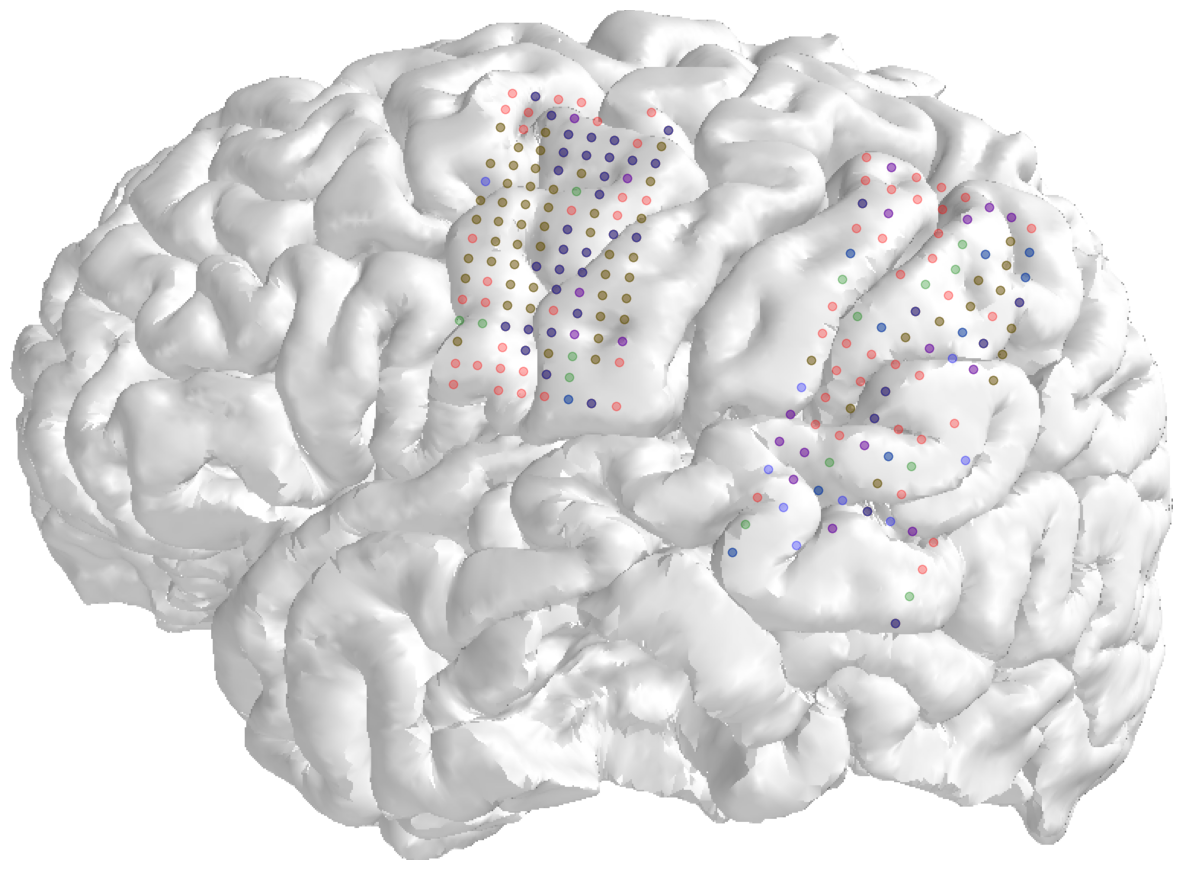

In [63]:
import matplotlib.image as mpimg
import scipy.io as scio



HS = 76
path = "D:\\BaiduSyncdisk\\code\\elecs\\"
elec_path = "D:\\BaiduSyncdisk\\code\\elecs\\"+str(HS)+"sig_elecs.npy"

subject = 'HS'+str(HS)
img = mpimg.imread(path + subject + "_brain2D.png")
xy = scio.loadmat(path + subject + "_elec_pos2D.mat")['elecmatrix']
plt.figure(figsize=(15,15))
sig_elecs = np.load(elec_path,allow_pickle=True).item()
plt.imshow(img)
n_chans = 256 if xy.shape[0] >= 256 else 128
colorset = ['r','g','b']

save_path = "TRF\\"+"HS"+str(HS)+"\\"

for i in range(3):
    for elec in range(n_chans):
        if elec in sig_elecs[task_name_list[i]]:
            plt.plot(xy[elec,0],xy[elec,1],marker = 'o',color=colorset[i],alpha = 0.3)
        

plt.box(on=None)
plt.yticks([])
plt.xticks([])
HS = 73